In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df=pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
#Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


In [7]:
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

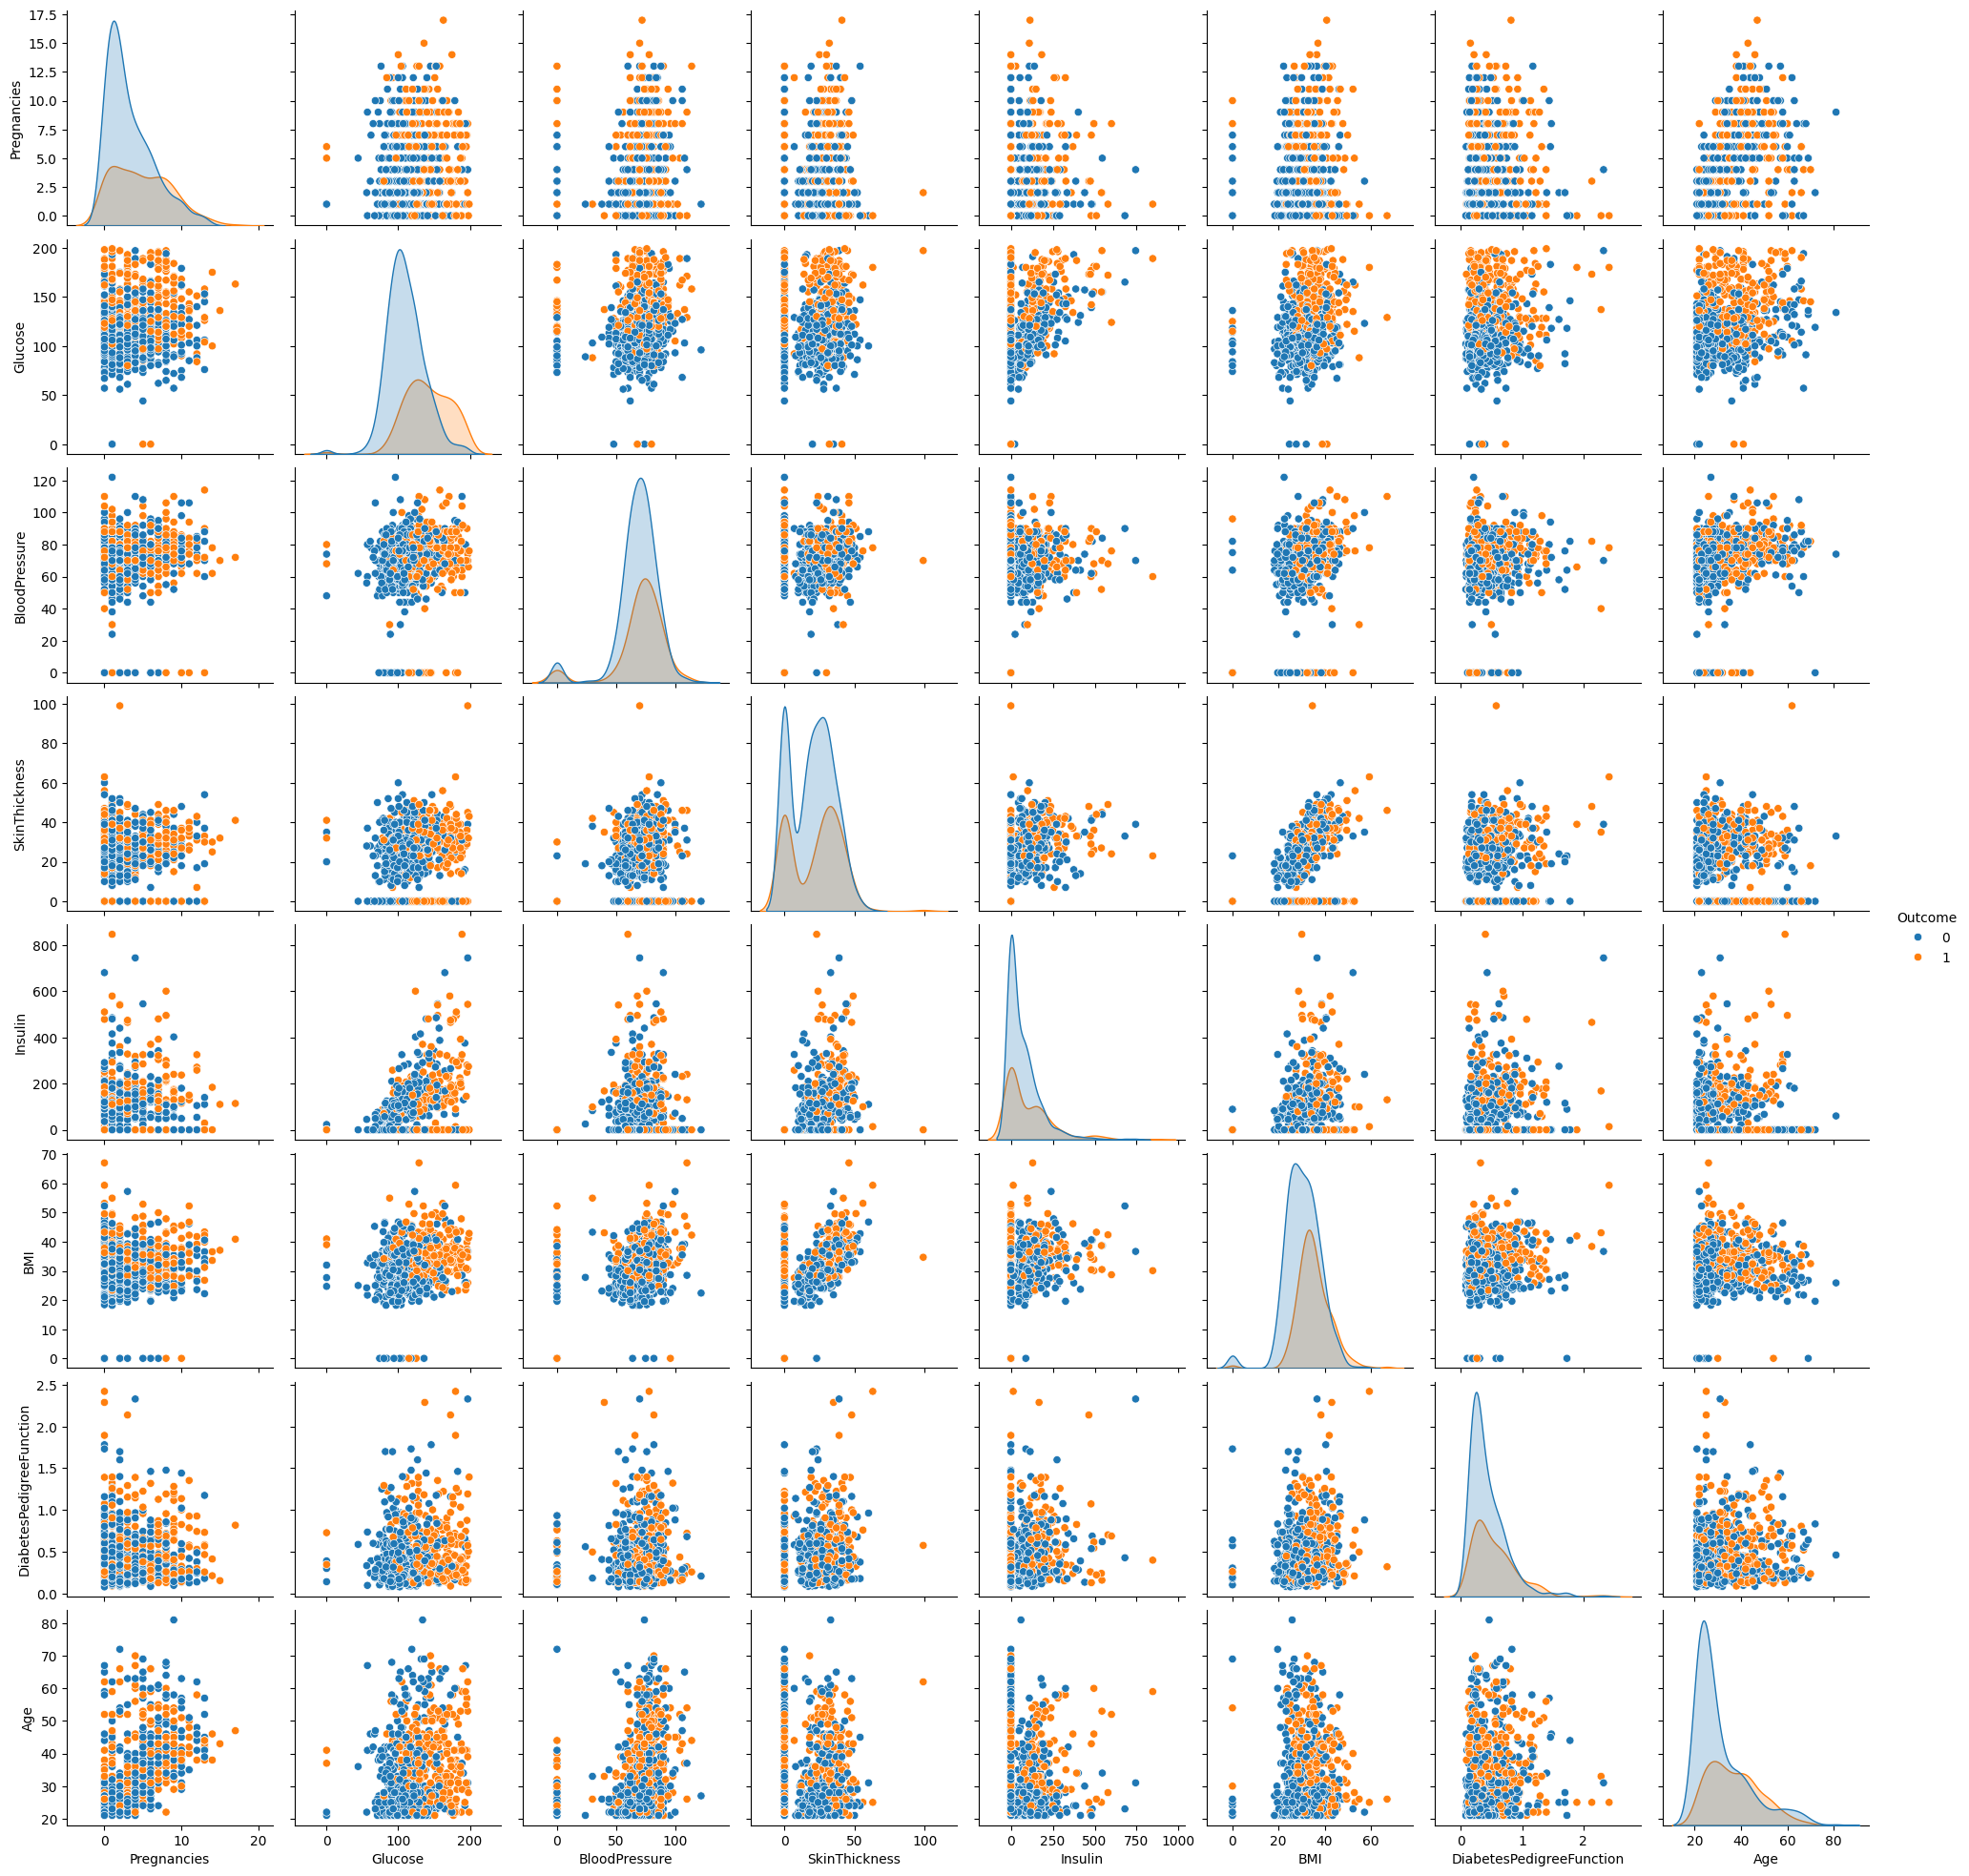

In [8]:
sns.pairplot(df, hue='Outcome')

In [9]:
filtered_df=df[(df.BloodPressure != 0) & (df.BMI != 0) & (df.Glucose != 0) & (df.Insulin != 0) & (df.SkinThickness != 0) & (df.DiabetesPedigreeFunction != 0) & (df.Age != 0)]

In [15]:
filtered_df['SkinThickness'].value_counts()

32    20
30    18
33    17
23    16
18    16
27    14
26    14
29    14
28    13
25    12
19    12
39    12
41    12
37    11
15    11
35    11
17    10
13    10
40    10
42     9
22     9
36     9
24     8
21     8
34     8
31     8
46     7
20     7
45     6
12     6
14     6
16     5
11     5
43     5
48     4
44     4
47     4
50     3
10     3
49     3
38     3
7      2
52     2
8      1
56     1
51     1
60     1
63     1
Name: SkinThickness, dtype: int64

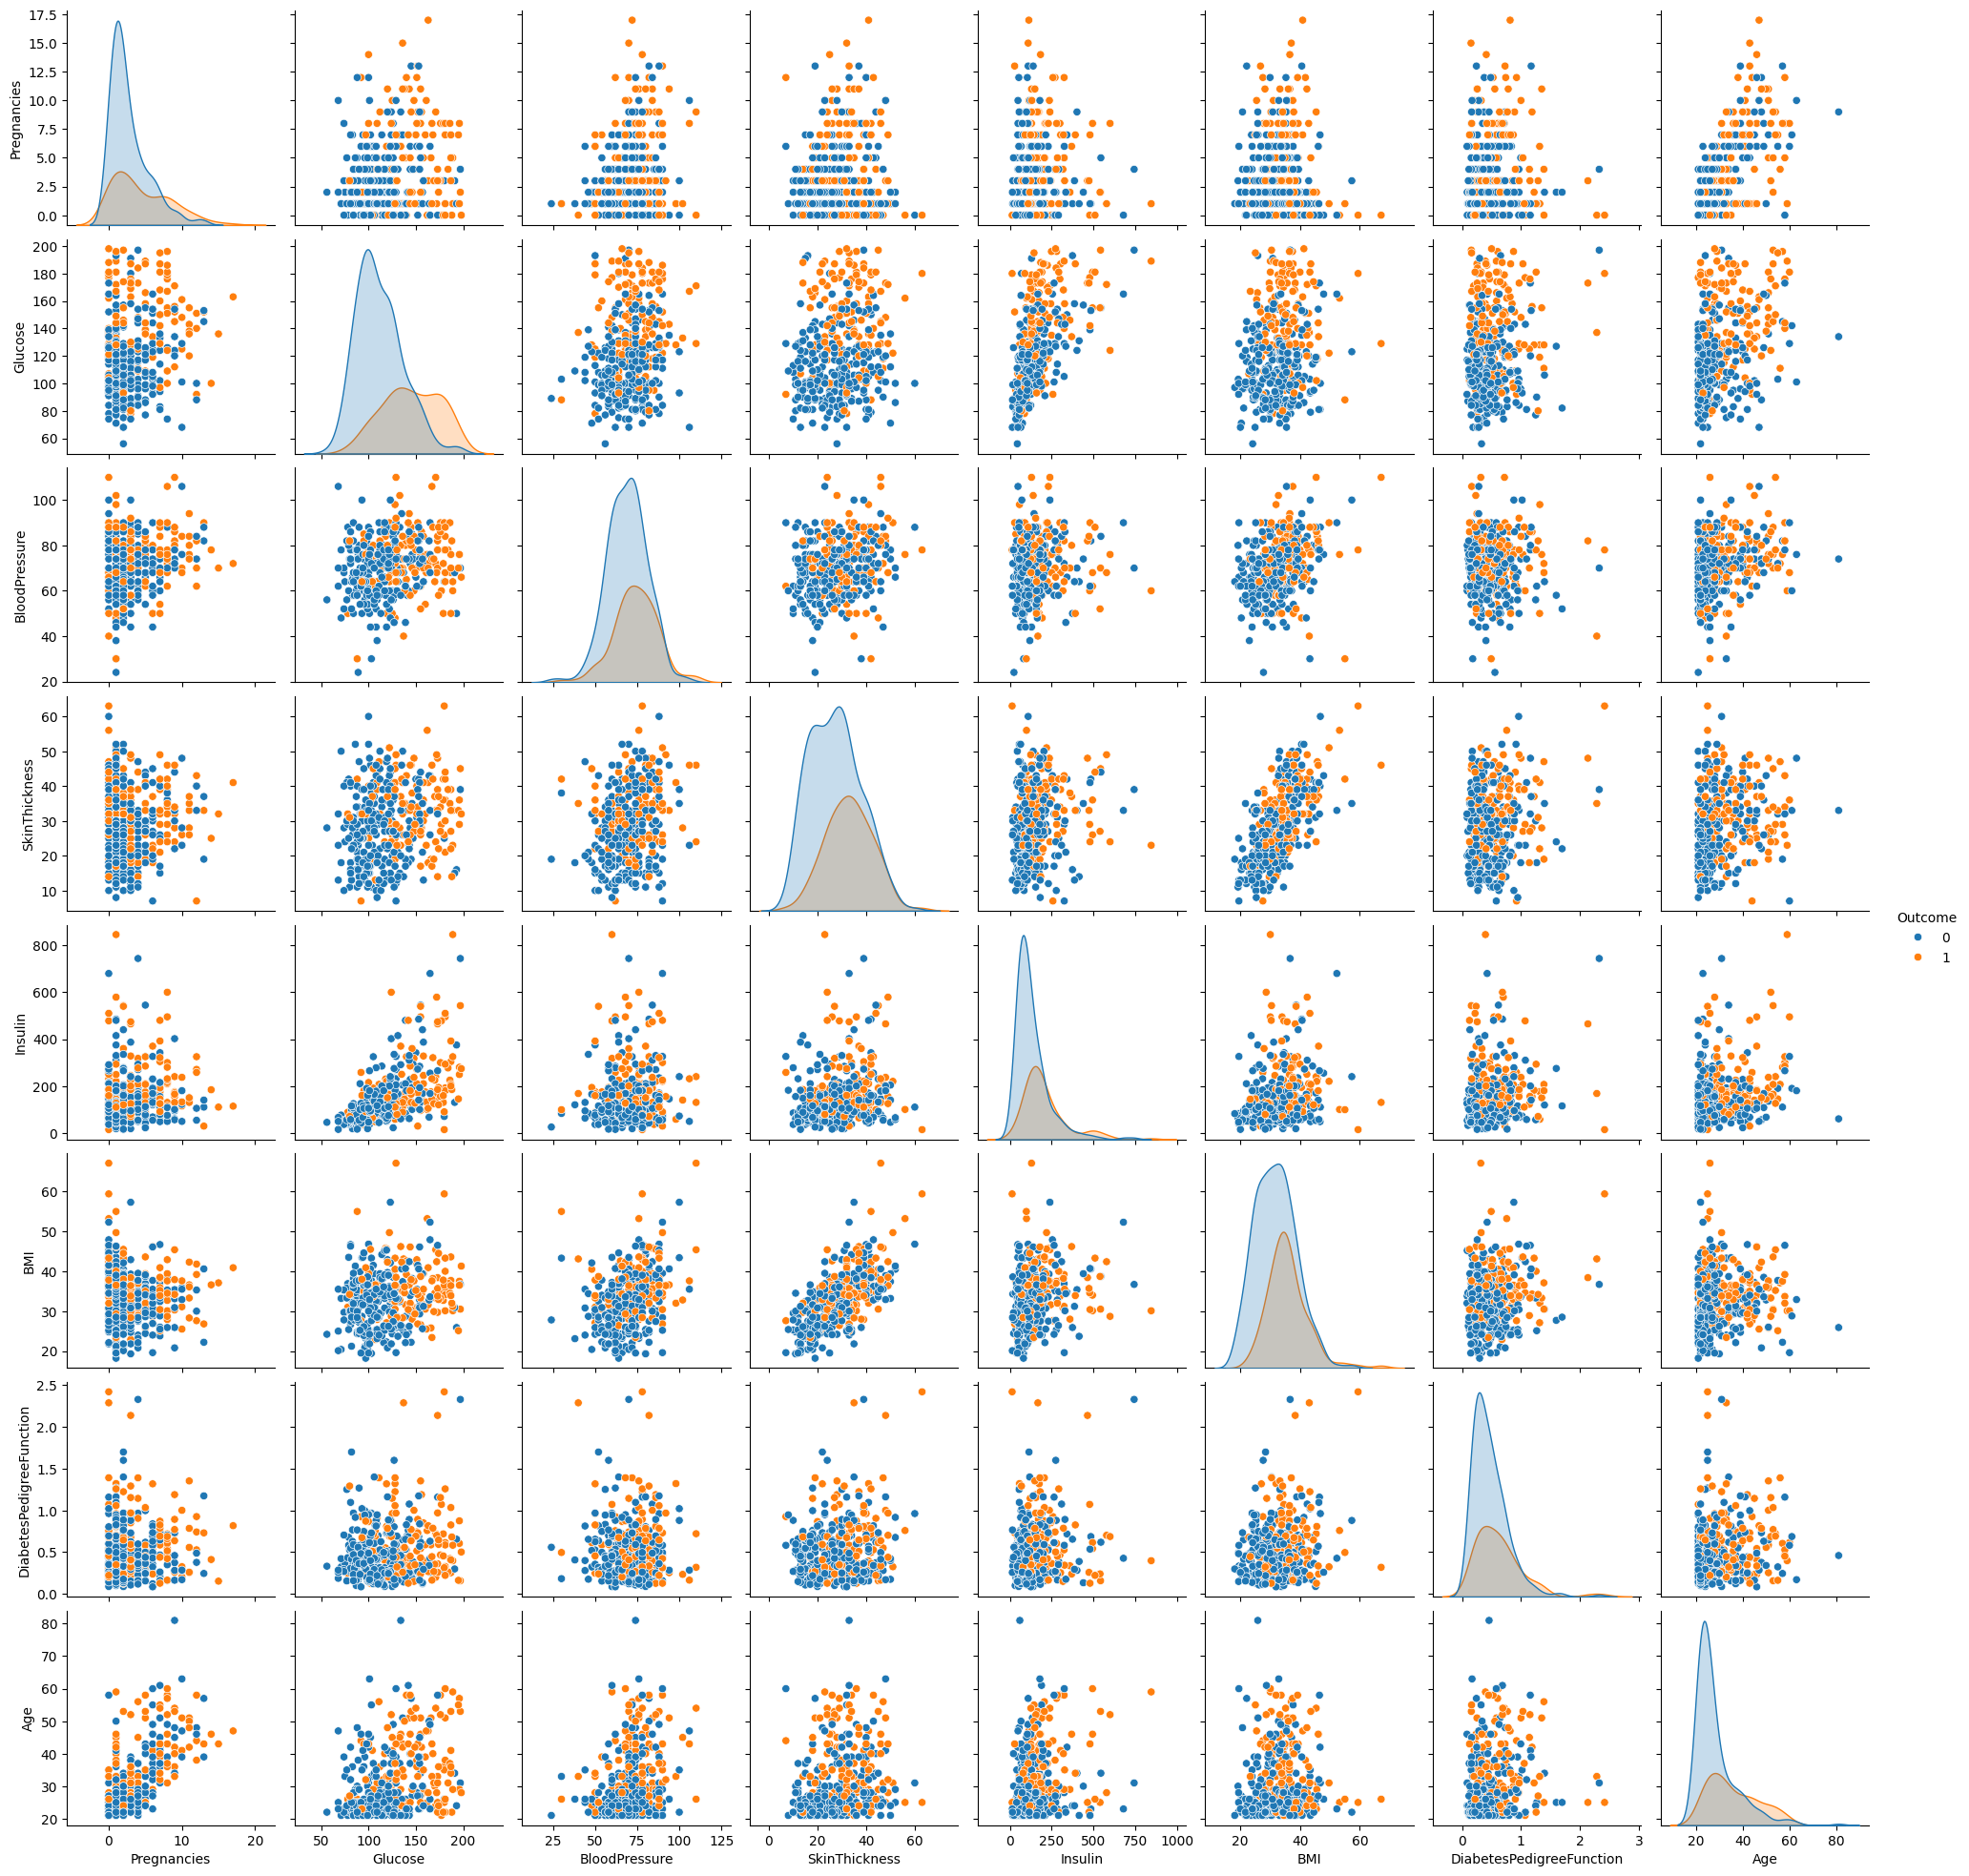

In [16]:
sns.pairplot(filtered_df, hue='Outcome')


<Axes: >

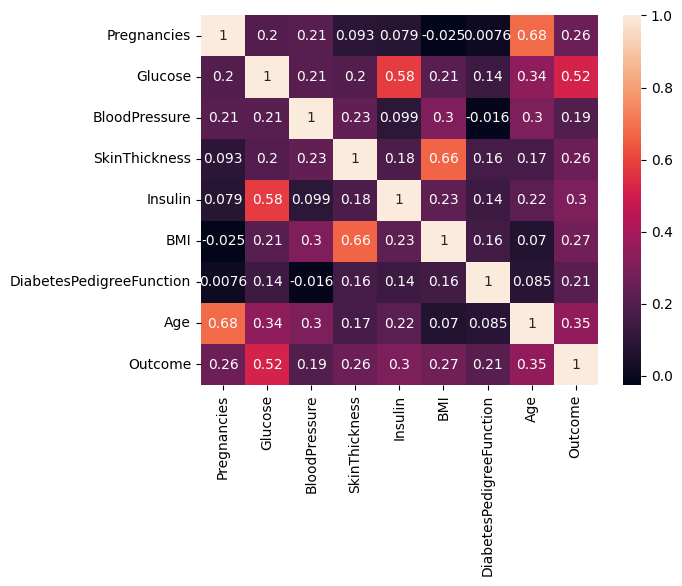

In [17]:
sns.heatmap(filtered_df.corr(), annot=True)

In [22]:
X=filtered_df.drop('Outcome',axis=1)
y=filtered_df['Outcome']


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [24]:
classifier = LogisticRegression(random_state=0)

In [25]:
from sklearn.model_selection import GridSearchCV
parameter={'penalty':['l1','l2','elasticnet'],'C':[1,2,3,4,5,6,10,20,30,40,50],'max_iter':[100,200,300]}

In [26]:
classifier_regressor=GridSearchCV(classifier,param_grid=parameter,scoring='accuracy',cv=5)

In [27]:
classifier_regressor.fit(X_train,y_train)

d:\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=0),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 20, 30, 40, 50],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [28]:
print(classifier_regressor.best_params_)

{'C': 1, 'max_iter': 200, 'penalty': 'l2'}


In [29]:
print(classifier_regressor.best_score_)

0.7924219150025602


In [30]:
y_pred=classifier_regressor.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.7974683544303798
